<a href="https://colab.research.google.com/github/trivedidn/BNFO301_Trivedi_Disha/blob/main/Assignment_7_Kmer_DishaTrivedi_BNFO301_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BNFO301 Assignment #7: K-mer </h1>

Most *de novo* genome assembly is done using de Bruijn graphs.  We discussed how these graphs give us a genome assembly given a set of K-1-mers in the lecture.  The the length of K is the most significant parameter of a de Bruijn graph assembly.  Sequence reads with less than K bases will not share and edge in the graph, genomic repeats longer than K will lead to forks, and a longer K will reduce the percent of "correct K-mers", when compared to a shorter K.  In this assignment, you will be tasked with detecting Kmers and evaluating K-mers.  Normally this would be done using sequence reads (e.g. Illumina paired-end reads), but here you will evaluate K given a complete genome, which provides additional insights.

Grading:

The assignment is worth 20 points and you will have meeting to complete the assignment.

Attendance: 5 points

Question 1: 5 points

Question 2: 5 points

Question 3: 5 points








### Setup
Read the Sequence Data File. 
Do not change the code, just run as is.

In [88]:
import os.path
# Load the genbank file 
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/homosapiens_hbb_data.fasta"
DEFAULT_FILE_NAME = 'homosapiens_hbb_data.fasta'
fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
   
print("Reading file:", fileName)


Reading file: homosapiens_hbb_data.fasta


###Question 1
**Counting Kmers** <br>
Count the total number of 7-mers in the hbb human gene contained within the downloaed file and print the first five k-mers.  This is in fasta format.

<br>
**Example return:** <br>
Total Number of 7-mers: 123 <br>
7-mer #0: ATCGCTA <br>
7-mer #1: TCGCTAG <br>
7-mer #2: CGCTAGC <br>
7-mer #3: GCTAGCG <br>
7-mer #4: CTAGCGA <br>


**Explanation and Example:**
A k-mer is a sequence of *k* characters in a string of nucloeitides in a DNA sequence.  Remember to extract all k-mers from a sequence you need to get the first k-characters in the string and move just a single character from the start of the next k-mer and so- on (this is known as a sliding window). This will create a sequence that overlaps in k-1 positions. The visual below shows this concept by extracting the 4-mers from the short nucleotide string.  

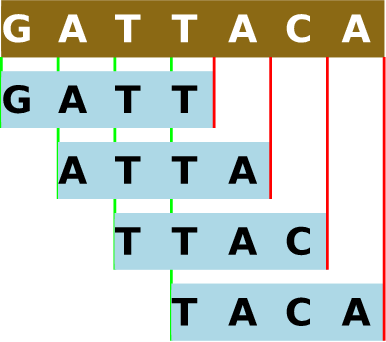



Q1 part a) Create a function to load the file and return the sequence and its header as a dictionary.

In [89]:
#Create function to load the file to a dictionary sequence
def LoadFasta(filepath):
  with open(fileName, 'r') as infile:
    lines = infile.readlines()
    seqIds = ''
    sequences = ''
    my_dict = {}
    for line in lines: 
      if(line[0] == ">"): 
        line = line.replace(">", " ")
        seqIds = line[1:-1]
        my_dict[seqIds] = sequences
      else: 
        sequences += line.strip()
    my_dict[seqIds] = sequences

  return my_dict 











sequences = LoadFasta(fileName)  
# Parse input file to generate two lists
sequence = list(sequences.values())[0]
#Print the sequence and its length
print("Sequence length is ", len(sequence), sequence)

Sequence length is  1608 ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAG

Q1 part b) Create a definition to find and count all K-mers.  Print the total number of K-mers and the first five K-mers found.  Do not reject K-mers that appear more than once in the genome.

In [90]:
# Function to find  a list of k-mers based on the value of k and s - sequence provided
def findKMers(k,sequence):
    #create list to store K-mers
  kmerlist = []
  


    #use the range function to generate an integer to create a sliding window and store K-mers in a list
  for i in range(0, len(sequence) - k+1): 
    kmerlist.append(sequence[i:i+k])
  return kmerlist


kmerlist = findKMers(7,sequence)
#Print 7-mer count
print("Total # of 7-mers are", len(kmerlist))
#Print first 5 7-mers
for i in range(5):
    print("7-mer #" , i , ":", kmerlist[i])


Total # of 7-mers are 1602
7-mer # 0 : ACATTTG
7-mer # 1 : CATTTGC
7-mer # 2 : ATTTGCT
7-mer # 3 : TTTGCTT
7-mer # 4 : TTGCTTC


### Question 2
Print the first 5 reverse complementary and canonical k-mers along with the original kmers from Question 1 in a table similar to the example below.


|Offset|0|1|2|3|4|
|-----|-------|-------|-------|-------|-------|
|7-mer|ATCGCTA|TCGCTAG|CGCTAGC|GCTAGCG|CTAGCGA|
|Reverse Complement|TCGCATA|CGCATAC|GCATACG|CATACGT|CATCGTA|
|Canonical|ATCGCTA|TCGCATA|CGCATAC|CATACGT|CATCGTA|

DNA is *normally* double stranded with bases paired on opposite strands read from 5' to 3'. Thus, we want to consider each location of the genome, both forward and reverse strands. Thus, we want to calcaulte the reverse complement of the sequence and extract the first 5 7-mers. 

Counting the abundance of K-mers is important.  K-mers are often presented as the canonical sequence. This is presenting the lexicographically smaller of the two reverse complementary sequences (the one that comes earliest in alphabetical order). Most k-mer counting tool will use the canonical k-mers when presenting a K-mer count. 



Q2 part a) Create definition that returns the Reverse Compliment Sequence of the genome

In [91]:
# Create reverse complimentary sequence by substituting bases
  # Flip A -> T
  # Flip T -> A
  # Flip C -> G
  # Flip G -> C
  # Reverse the string

def createComplimantrySequence(s):
  compSequence = ""
  for char in s:
    if char == "T":
        compSequence += "A"
    elif char == "A":
        compSequence += "T"
    elif char == "C": 
        compSequence += "G" 
    elif char == "G": 
        compSequence += "C"
        
#reverse the sequence to get complementary strand 
  compSequence = (compSequence[::-1])

  return compSequence



compSequence = createComplimantrySequence(sequence)
print(compSequence[0:100])

TTGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTCAAGGCCCTTCATAATATCCCCCAGTTTAGTAGTTGGACTTAGGGAACAAAGGAA


Q2 part b) Count the total number of 7-mers in the reverse complement genome and print the total number of K-mers and the first five K-mers. Use the definition created in Question 1 part B.

In [92]:

#find compliment kmers
compKmerlist = findKMers(7,compSequence)

#Print 7-mer count
print("Total # of 7-mers are", len(compKmerlist))

#Print first 5 7-mers
for i in range(5):
    print("7-mer #" , i , ":", compKmerlist[i])



Total # of 7-mers are 1602
7-mer # 0 : TTGCAAT
7-mer # 1 : TGCAATG
7-mer # 2 : GCAATGA
7-mer # 3 : CAATGAA
7-mer # 4 : AATGAAA


Q2 part c) Create definition to find the Canonical Sequence for each K-mer pair (forward and Reverse Complement) and create print statement similar Question 2 part B.

In [93]:
def createCanonicalSequeces(sequences, reverseComplimentSequences):
# Expect that the sequences and reverseComplimentsSequences are of the same length
    
  canonicalSequencesList = [] 
  if len(sequences) != len(reverseComplimentSequences):
    return canonicalSequencesList

  for i in range(len(sequences)):
    if sequences[i] < reverseComplimentSequences[i]: 
      canonicalSequencesList.append(sequences[i])
    else: 
      canonicalSequencesList.append(reverseComplimentSequences[i])
  

    
  return canonicalSequencesList




canonicalSequencesList = createCanonicalSequeces(kmerlist, compKmerlist)
#Print the 7-mer count
print("Total # of 7-mers are", len(compKmerlist))
#Print first 5 Kmers
for i in range(5):
  print("7-mer #" , i , ":", compKmerlist[i])


Total # of 7-mers are 1602
7-mer # 0 : TTGCAAT
7-mer # 1 : TGCAATG
7-mer # 2 : GCAATGA
7-mer # 3 : CAATGAA
7-mer # 4 : AATGAAA


Q2 part d) Create a definition that prints out a table that contains the 7-mer, its RC 7-mer, and the Canoical K-mer

In [94]:
#Print the requested table uisng the format in the example
from prettytable import PrettyTable 

def nicePrint(kmerlist, compKmerlist, canonicalSequencesList):
  niceTable = PrettyTable(["Offset", 1, 2, 3, 4])

  niceTable.add_row(["7-mer", kmerlist [1], kmerlist [2], kmerlist [3], kmerlist [4]])
  niceTable.add_row(["RC 7-mer", compKmerlist [1], compKmerlist [2], compKmerlist [3], compKmerlist [4]])
  niceTable.add_row(["Canoical K-mer", canonicalSequencesList [1], canonicalSequencesList[2], canonicalSequencesList[3], canonicalSequencesList[4]])

  print(niceTable)

nicePrint(kmerlist, compKmerlist, canonicalSequencesList)

+----------------+---------+---------+---------+---------+
|     Offset     |    1    |    2    |    3    |    4    |
+----------------+---------+---------+---------+---------+
|     7-mer      | CATTTGC | ATTTGCT | TTTGCTT | TTGCTTC |
|    RC 7-mer    | TGCAATG | GCAATGA | CAATGAA | AATGAAA |
| Canoical K-mer | CATTTGC | ATTTGCT | CAATGAA | AATGAAA |
+----------------+---------+---------+---------+---------+


### Question 3
#### Distinct, unique and total k-mers
For the following sequence:`AATCGGGGTATC`, calculate the total, distinct, and unique count of the canonical 3-mers. 

*Total k-mers* are the sum of k-mers that can be obtained from the sequence given k.

*Distinct k-mers* are counted only once, even if they appear multiple times.

*Unique k-mers* are those that appear only once. Unique k-mers are very important for analysis. 

Q3 part a) Find 3-mers and their compliments

In [95]:
#create a list of distinct 3-mers in this sequence
sequence = "AATCGGGGTATC"
#Ues a previously created definition to find 3 mers
def findKMers(k,sequence):
    #create list to store K-mers
  kmerlist2 = []
    #use the range function to generate an integer to create a sliding window and store K-mers in a list
  for i in range(0, len(sequence) - k+1): 
    kmerlist2.append(sequence[i:i+k])
  return kmerlist2

#print total count of 3-mers and all 3-mers
kmerlist2 = findKMers(3,sequence)
totalAmount = len(kmerlist2)
print("Total Amount of Kmers:" ,totalAmount)
print("Kmers:", kmerlist2)

#Use a previously created definition to find the compliment of the sequence
def createComplimantrySequence(s):
  compSequence2 = ""
  for char in s:
    if char == "T":
        compSequence2 += "A"
    elif char == "A":
        compSequence2 += "T"
    elif char == "C": 
        compSequence2 += "G" 
    elif char == "G": 
        compSequence2 += "C"
        
#reverse the sequence to get complementary strand 
  compSequence2 = (compSequence2[::-1])

  return compSequence2



compSequence2 = createComplimantrySequence(sequence)
print("Complementary Sequence is:", compSequence2[0:100])

#Use a previously created defition to find compliment kmers
compKmerlist2 = findKMers(3,compSequence2)
totalcompAmount2 = len(compKmerlist2)

#Again, print the count of 3-mers and the 3-mers themselves
print("Total Amount of Kmers for Complimentary Sequence:", totalcompAmount2)

#Print the 3 mers
print("Kmers for Complimentary Sequence:", compKmerlist2)




Total Amount of Kmers: 10
Kmers: ['AAT', 'ATC', 'TCG', 'CGG', 'GGG', 'GGG', 'GGT', 'GTA', 'TAT', 'ATC']
Complementary Sequence is: GATACCCCGATT
Total Amount of Kmers for Complimentary Sequence: 10
Kmers for Complimentary Sequence: ['GAT', 'ATA', 'TAC', 'ACC', 'CCC', 'CCC', 'CCG', 'CGA', 'GAT', 'ATT']


Q3 part b) Find canonical, distinct and unique K-mers given the list of 3-mers created in the part a

In [102]:
# Create a definition to find a distinct list, from a list of different elements (ignore the duplicates)
def createDistinctList(one):
  if len(one) == 0: 
    return one 
  
  distinctlist = []
  for i in range(len(one)): 
    kmervalue = one[i]
    if kmervalue not in distinctlist: 
      distinctlist.append(kmervalue)
  
  return distinctlist



# Create a defintion to find a unique list, from a list of different elements (ignore any sequence that has more then one occurnace)
def createUniqueList(one):
  if len(one) == 0: 
    return ; 
  
  uniquelist = []
  kmerdict = {}

  for i in range (len(one)): 
    kmervalue = one[i]
    
    if kmervalue not in kmerdict.keys(): 
      kmerdict[kmervalue] = 1 
    else: 
      kmerdict[kmervalue] += 1 
  
  for key, value in kmerdict.items(): 
    if value == 1:
      uniquelist.append(key)
  
  return uniquelist 




# Find canonical sequences from the 3-mers
cantonicalSequencesList = createCanonicalSequeces(kmerlist2, compKmerlist2)
print("Canonical 3-mers  are", len(canonicalSequencesList), cantonicalSequencesList)
# Find distinct sequences from the 3-mers
distinctlist = createDistinctList(canonicalSequencesList)
print("Total distinct Kmers found are ", len(distinctlist), distinctlist)
# Find unique sequences from the 3-mers
uniquelist =  createUniqueList(canonicalSequencesList)
print("Total Unique Kmers found are ", len(uniquelist), uniquelist)

#note: for my output I tried changing the variable names so that it would calculate the kmers based off the sequence given in q3 part a, however for some reason it is calculating them
#based off the sequence given in the file. 

Canonical 3-mers  are 1602 ['AAT', 'ATA', 'TAC', 'ACC', 'CCC', 'CCC', 'CCG', 'CGA', 'GAT', 'ATC']
Total distinct Kmers found are  1377 ['ACATTTG', 'CATTTGC', 'ATTTGCT', 'CAATGAA', 'AATGAAA', 'ATGAAAA', 'GCTTCTG', 'CTTCTGA', 'AAAATAA', 'AAATAAA', 'AATAAAT', 'ATAAATG', 'GACACAA', 'AAATGTT', 'AATGTTT', 'ACAACTG', 'CAACTGT', 'AACTGTG', 'ACTGTGT', 'CTGTGTT', 'TGTGTTC', 'GTGTTCA', 'TGTTCAC', 'GTTCACT', 'ATTAGGC', 'TCACTAG', 'CACTAGC', 'ACTAGCA', 'CTAGCAA', 'GCAGAAT', 'AGCAACC', 'AGAATCC', 'CAACCTC', 'AACCTCA', 'ACCTCAA', 'CCTCAAA', 'CCAGATG', 'CAGATGC', 'AGATGCT', 'AAACAGA', 'AACAGAC', 'ACAGACA', 'CAGACAC', 'AGACACC', 'GACACCA', 'ACACCAT', 'AAGGCCC', 'ACCATGG', 'CCATGGT', 'CATGGTG', 'ATGGTGC', 'CCTTCAT', 'CTTCATA', 'GTGCATC', 'TCATAAT', 'CATAATA', 'ATAATAT', 'ATCTGAC', 'AATATCC', 'ATATCCC', 'TATCCCC', 'ATCCCCC', 'ACTCCTG', 'CCCCCAG', 'CCCCAGT', 'CCCAGTT', 'CCAGTTT', 'CAGTTTA', 'AGTTTAG', 'AGGAGAA', 'GGAGAAG', 'GAGAAGT', 'AGAAGTC', 'AGTAGTT', 'AAGTCTG', 'AGTCTGC', 'AGTTGGA', 'GTTGGAC', 'CTGCC

### Question 4
#### For the sequence provided in Question 1, create a definition to find the smallest k-mer size where every k-mer is unique for the hbb sequence (i.e. number of unique,distinct and total k-mers are the equal number).  Start with K=2 and keep adding 1 until the objective is reached.




In [97]:
#Finds the total, unique and distinct Kmar counts
# Create a definition the returns as a tuple, that includes unique, distinct, and total K-mers by utilizing defintions that you have already created
def findKmerTypes(k, sequence):
  


# Use the fasta loader to obtain the original HBB sequence from question 1

#Recal that the original fasta loader creates a dictionary, so you need to generate a sequence list


#use a for loop that uses the "findKmerTypes" definition to determine when each K-mer class is equal in count to the others.  







      #Recall that you need to add a break when the values are equal
      break


SyntaxError: ignored